In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_dataset=pd.read_csv("/content/Electrical Energy Dataset/Train.csv")
test_dataset=pd.read_csv("/content/Electrical Energy Dataset/Test.csv")

In [ ]:
train_dataset.info()
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           9188 non-null   float64
 1   input_voltage  9188 non-null   float64
 2   el_power       9188 non-null   float64
dtypes: float64(3)
memory usage: 215.5 KB


,time,input_voltage,el_power
0,810.00,3.0,1102.949693
1,811.04,3.0,1199.403786
2,812.08,3.0,1113.199817
3,813.18,3.0,1200.377939
4,814.18,3.0,1105.465349


In [6]:
X_train = train_dataset.drop(columns=['el_power'])
y_train = train_dataset['el_power']


In [7]:
X_test = train_dataset.drop(columns=['el_power'])
y_test = train_dataset['el_power']

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 151193.0650196387
R-squared: 0.6851835690756447


In [12]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 447.96324585095954
Coefficients: [2.92183018e-02 2.43630364e+02]


Graphical representation of the model performance

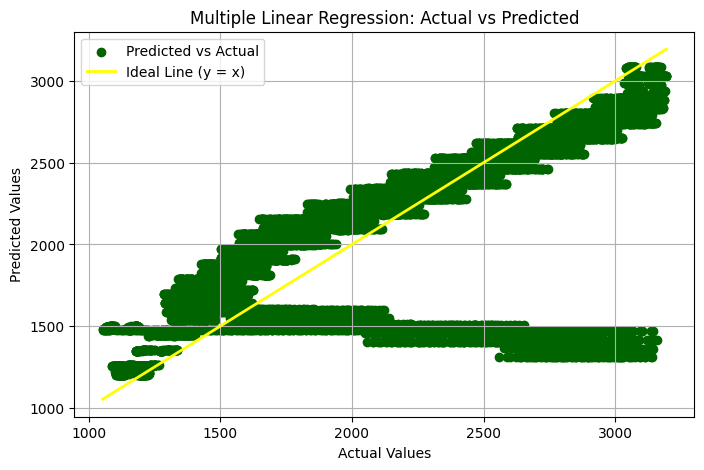

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='darkgreen', label="Predicted vs Actual")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow', linewidth=2, label="Ideal Line (y = x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression: Actual vs Predicted")

plt.legend()

plt.grid(True)
plt.show()


This graph shows the line of best fit (green line) and the feature X plotted (red line), looking at this graph it can be seen that our model is not performing well. because this line does not close around plotted graph hence indicating the poor performance of our model.

In [25]:
def gradient_descent(x, y, learning_rate=0.02, iterations=50):
    m_current = np.zeros(x.shape[1])
    b_current = 0
    n = len(x)

    for i in range(iterations):
        y_predicted = np.dot(x, m_current) + b_current


        md = -(2/n) * np.dot(x.T, (y - y_predicted))
        bd = -(2/n) * np.sum(y - y_predicted)


        m_current -= learning_rate * md
        b_current -= learning_rate * bd

        print(f"Iteration {i}: m = {m_current}, b = {b_current}")

    return m_current, b_current

Since we have already performed linear regression on our certain model, we will convert our dataset to arrays then apply our gradient descent function to them

In [26]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)

In [27]:
m, b = gradient_descent(X_train_array, y_train_array, learning_rate=0.02, iterations=50)

Iteration 0: m = [4.69639587e+05 4.50240851e+02], b = 75.96927386820899
Iteration 1: m = [-8.01743383e+11 -6.08067599e+08], b = -109365946.1716441
Iteration 2: m = [1.36869367e+18 1.03806094e+15], b = 186703762521143.3
Iteration 3: m = [-2.33656105e+24 -1.77212243e+21], b = -3.187307348646341e+20
Iteration 4: m = [3.98885276e+30 3.02527318e+27], b = 5.441201611341922e+26
Iteration 5: m = [-6.80955732e+36 -5.16458549e+33], b = -9.288930039283457e+32
Iteration 6: m = [1.16249141e+43 8.81670571e+39], b = 1.5857567397401205e+39
Iteration 7: m = [-1.98454352e+49 -1.50514111e+46], b = -2.707119578893062e+45
Iteration 8: m = [3.38790717e+55 2.56949687e+52], b = 4.6214505861896435e+51
Iteration 9: m = [-5.78365495e+61 -4.38650841e+58], b = -7.88949468177012e+57
Iteration 10: m = [9.87354818e+67 7.48841390e+64], b = 1.3468525774068466e+64
Iteration 11: m = [-1.68555964e+74 -1.27838220e+71], b = -2.29927509737603e+70
Iteration 12: m = [2.87749778e+80 2.18238611e+77], b = 3.925200175651144e+76
It

<ipython-input-25-ca3c17ffff34>:14: RuntimeWarning: invalid value encountered in subtract
  m_current -= learning_rate * md


In [28]:
def predict(X, m, b):
    return m * X + b

y_pred_gd = predict(X_test, m, b)
print("Predictions for X_test =", X_test, "are:",y_pred_gd)

Predictions for X_test =           time  input_voltage
0       810.00            3.0
1       811.04            3.0
2       812.08            3.0
3       813.18            3.0
4       814.18            3.0
...        ...            ...
9183  10950.28            3.0
9184  10951.34            3.0
9185  10952.42            3.0
9186  10953.48            3.0
9187  10954.52            3.0

[9188 rows x 2 columns] are:       time  input_voltage
0      NaN           -inf
1      NaN           -inf
2      NaN           -inf
3      NaN           -inf
4      NaN           -inf
...    ...            ...
9183   NaN           -inf
9184   NaN           -inf
9185   NaN           -inf
9186   NaN           -inf
9187   NaN           -inf

[9188 rows x 2 columns]
